In [ ]:
!pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 42.1 MB/s eta 0:00:00


In [ ]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords

# Define the coordinates of a region with known spectra (update these coordinates)
pos = coords.SkyCoord('10h00m00.0s +02d12m00.0s', frame='icrs')

# Query the SDSS database for spectra at the specified coordinates
xid = SDSS.query_region(pos,radius='5 arcsec', spectro=True)

# Check if the query returned any results
if xid is None or len(xid) == 0:
    print("No spectra found at the specified coordinates.")
else:
    # Extract plate, mjd, and fiberID from the query results
    plate = xid[0]['plate']
    mjd = xid[0]['mjd']
    fiberID = xid[0]['fiberID']

    # Download the FITS file for the spectrum using the identifiers
    hdulist = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiberID)

    # Save the FITS file locally
    hdulist[0].writeto('example_spectrum.fits')
    print("FITS file downloaded and saved as 'example_spectrum.fits'.")


No spectra found at the specified coordinates.


In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the FITS file
hdu_list = fits.open('/content/Hubble_Images_a_Classic_Spiral_06_09_2024.FITS.fits')

# Print the header information of the primary HDU
print(hdu_list.info())


Filename: /content/Hubble_Images_a_Classic_Spiral_06_09_2024.FITS.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (1359, 1080)   float32   
None


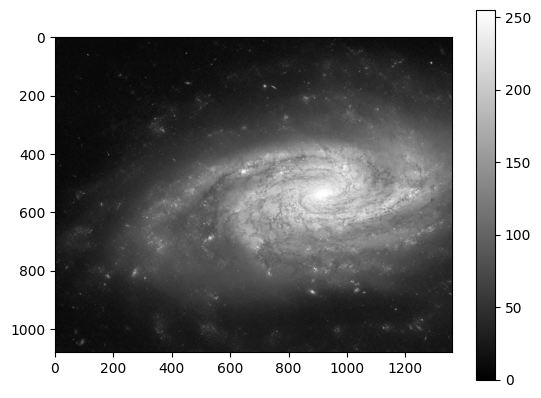

In [ ]:
# Access a specific band
image_data = hdu_list[0].data

# Display the image
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()


In [ ]:
import numpy as np

def normalize(image_data):
    # Normalize the image data to 0-1
    min_val = np.min(image_data)
    max_val = np.max(image_data)
    return (image_data - min_val) / (max_val - min_val)


In [ ]:
from skimage import registration

def align_images(ref_image, target_image):
    # Use phase cross-correlation for alignment
    shift, error, diffphase = registration.phase_cross_correlation(ref_image, target_image)
    return np.roll(target_image, shift.astype(int), axis=(0, 1))


In [ ]:
from skimage import exposure

def enhance_contrast(image_data):
    # Apply adaptive histogram equalization
    return exposure.equalize_adapthist(image_data)


In [ ]:
from skimage import restoration

def denoise_image(image_data):
    # Apply Non-Local Means denoising
    return restoration.denoise_nl_means(image_data, h=0.1)


In [ ]:
def combine_bands(red_band, green_band, blue_band):
    # Stack images into a single RGB image
    return np.stack((red_band, green_band, blue_band), axis=-1)


In [ ]:
def adjust_color_balance(rgb_image):
    # Adjust color balance
    return exposure.rescale_intensity(rgb_image, in_range=(0, 1), out_range=(0, 1))


In [ ]:
def calculate_snr(image, signal_area, noise_area):
    # Calculate SNR for a specific region
    signal = np.mean(image[signal_area])
    noise = np.std(image[noise_area])
    return signal / noise
